# 8 Random numbers

Many physical processes cannot be modelled purely by starting from a known set of initial conditions (for example, calculating the trajectory of a ball given its initial position and speed). Indeed our understanding of thermodynamics as 'statistical physics' implies we do not know, for example, the exact position and speed of the atoms in gas at a particular time $t$. So how might we model the behaviour of the atoms in a gas numerically? We do not have the time in this unit to describe the details of how me might do this but the essence is we need to set the starting conditions of our model from statistical distributions that we generate with random numbers. Hence random number generators are important functions that we often need to use for numerical modelling. As you may well realise, random generators are also used extensivley in computer games, they would be boring if they were too predictable.

There are many ways that you might concieve for producing random numbers in a computer programme. However, it can be surprisingly difficult to do this well and many of the early computer implementations of random number generators were found not to produce truly random numbers at all, even if the repeat period was very long.

This said the random number generator in python is very good and more than satisfactory for our purposes.

In this notebook you will learn: 

- how to use the 'random' package in python,
- about the different random number function generators available
- use the random number to demonstrate a simple modelling method - the 2D random walk.

## 8.1 the python random number generators

In order to use the random number generator you need to import the random number generator package into your program. 

### 8.1.1 random() - generating random floating point numbers between 0 and 1

Run the code fragment below several times and look at the output

In [7]:
import random as ran
#dir(random)       #uncomment this line if you wish to look at the attributes of random package
for i in range(5) :
    print(ran.random())

0.7482971427882245
0.7929937670253614
0.7271594140459221
0.07967222886667347
0.8207677113861774


Note how the numbers are always between 0 and 1 and that they change each time the code is run. Now look at the code below.

In [11]:
import random as ran
ran.seed(7)
for i in range(5) :
    print(ran.random())

0.32383276483316237
0.15084917392450192
0.6509344730398537
0.07243628666754276
0.5358820043066892


In this case you may note that we have fixed  our own 'seed' point for the random generator, rather than python finding its own, random seed. Look how the same sequence of numbers is produced! Change the value of the seed and see what happens. You should not need to seed your random generator but occasionally, for example, when debugging, it can be useful to generate the same sequence of random numbers.

In the _random_ package there are functions for generating random integers, floats and sampling lists We will look briefly at them here.

### 8.1.2 random integer generation

Look carefully at and run the following code.

In [15]:
print("A random integer in the range 0 to 4         :",ran.randrange(5))
print("A random integer in the range 2 to 9         :",ran.randrange(2,10))
print("A random even integer in the range 2 to 8    :",ran.randrange(2,10,2))
print("A random integer in the range 5 to 10        :",ran.randint(5,10))



A random integer in the range 0 to 4         : 4
A random integer in the range 2 to 9         : 3
A random even integer in the range 2 to 8    : 4
A random integer in the range 5 to 10        : 10


The 'randrange' function generatres a random integer in the range specified. The range of integer numbers from which the random number may be elected follows the same rule as the basic 'range' function in python. 

__Hint.__ Remember that _range(n)_ gives n integers in the range 0 to n-1 _and_ not 1 to n. 

The 'randint' function, while less versatile, makes it easier to use as randint(n,m) includes the numbers n and m in the possible range of integers that can be generated. It is equivalent to radrange(n,m+1). 

Here's an example of a programme that we could use as 'double dice' when playing board games. How long does it take you to throw a double six?

In [17]:
# A short programme to generate the throw of two dice for a board game
#
dice1=ran.randrange(6)+1
dice2=ran.randrange(6)+1
print("you have thrown  ",dice1," and ",dice2)

you have thrown   1  and  5


### 8.1.3 random float generation

Look carefully at and run the following code. Rerun it several times to observe how the numbers changed


In [18]:
print(ran.uniform(5.5,10.3))
print(ran.gauss(10.0,1.0))

8.310598828673857
10.672857190514563


The uniform function generates a floating point random number between the two numbers in the range (n,m) whereas the gauss function generates a random number with probability according to a gaussian distribution ($\mu,\sigma$) where $\mu$ is the mean and $\sigma$ is the standard deviation. 

We can use the matplotlib library to plot out random numbers in terms of a histogram. The programme code below generates random numbers for either the gaussian or uniform distribution. Uncomment the appropriate line to plot the distribution you want. You can also change the number of points, and the range (or mean and standard deviation). Note, how for a large number of numbers the shape of the distribution becomes clearer. Apart from plotting the histogram you should be familiar with rest of the python code. 



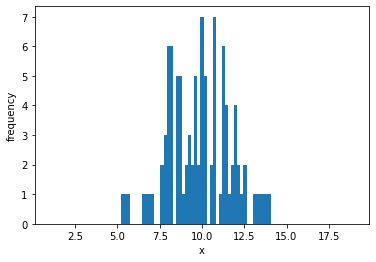

In [24]:
import numpy as np
from matplotlib import pyplot as plt
npts=100
mu=10.0
sig=1.8
nbins = 100
fln=np.zeros(npts)

for i in range (npts-1):
    fln[i] = ran.gauss(mu,sig)
#    fln[i] =ran.uniform(mu-5*sig,mu+5*sig) #uncomment appropriate line to select gaussian or uniform distribution

#
# As you become more experienced in python you find you can write code in more compact form. For example, the 
# for loop above could be written in a single line as show below. Uncomment this line if you wish to check.
#    
# fln = [ran.gauss(mu, sig) for i in range(npts-1)]

    
bins = np.linspace(-sig*5+mu,sig*5+mu,nbins)  # plot over the 5 sigma range about the mean mu.
plt.hist(fln,bins)
plt.ylabel('frequency')
plt.xlabel('x');

### 8.1.4 random sampling from lists

If we have a python list there are several ways of using the random package by which we can sample from or shuffle the list. We will quickly have a look at the 'choice','choices', 'sample' and 'shuffle' functions by imagining a small pack of cards with all Jacks. 

Look at carefully and run the following programme noting the output changes each time you run it.

In [25]:
import random as ran
cards=["Jack Hearts", "Jack Spades", "Jack Diamonds", "Jack Clubs"]
print("The cards are               :",cards)
print("A random choice of card is  :", ran.choice(cards))
print("Pick a random card 5 times replacing each time:",ran.choices(cards,k=5))
ran.shuffle(cards)
print("The shuffled cards are      :",cards)
print("Pick 3 cards without replacing",ran.sample(cards,k=3))



The cards are               : ['Jack Hearts', 'Jack Spades', 'Jack Diamonds', 'Jack Clubs']
A random choice of card is  : Jack Clubs
Pick a random card 5 times replacing each time: ['Jack Spades', 'Jack Clubs', 'Jack Clubs', 'Jack Spades', 'Jack Spades']
The shuffled cards are      : ['Jack Spades', 'Jack Clubs', 'Jack Diamonds', 'Jack Hearts']
Pick 3 cards without replacing ['Jack Diamonds', 'Jack Clubs', 'Jack Hearts']


From this code we can see that the :
    
'choice' functon selects a random item from the list,

'choices' function selects a random item 'k' times from the list, allowing the same item to be selected multiple times,

'sample' function selects a random item 'k' times from the list. Each item can only be selected once. (so k can never be more than the number of items in the list'.

'shuffle' function shuffles the order of the items in the list

## 8.2 Example programme using random numbers.



## 8.2.1 The 2D random walk

A very simple computer simulation that you can do is the 2D random walk which comprises taking equal steps in random directions one after the other. The best way to describe the walk is a phasor of the form,

$z_N = \sum_{j=1}^N r_{step}\exp(i\theta_j)$

where $z_N$ is the final position, in phasor form, of the particle after $N$ steps and $\theta_i$ is a random direction in the interval $0 \le \theta \lt2\pi$.

You can use the the _uniform_ function from the _random_ package to generate these random directions and hence to plot the trajectories for a random series of particles.  

The code below generates and plots a random walk of _nsteps_ unit steps as well as printing out the final distance travelled from origin. Run the code a few times noting how the trajectory changes and see how the final distance travelled changes each time. You may change the size of _nsteps_ to simulate longer walks but note how the time it takes to execute the programme increases. 

You might note how some paths are fairly compact, while others are quite 'stringy'. This is typical of this kind of random walk. 

distance travelled is 134.1321965484109


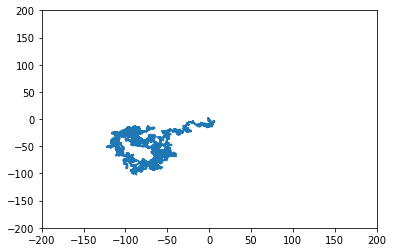

In [39]:
import numpy as np
import matplotlib.pyplot as plt
nsteps=10000
x=np.zeros(nsteps)
y=np.zeros(nsteps)
x[0]=0.0
y[0]=0.0
step=1.0
for i in range(1,nsteps):
    theta=ran.uniform(0,2*np.pi)
    x[i]=x[i-1]+step*np.cos(theta)
    y[i]=y[i-1]+step*np.sin(theta)
    
print("distance travelled is",np.sqrt(x[nsteps-1]**2+y[nsteps-1]**2) )   
limit=np.sqrt(nsteps)*2
plt.plot(x,y)
plt.axis([-limit,limit,-limit,limit])
plt.show()

The code above is interesting and allows us to picture the random walk but it in practice we don't want to know about individual trajectories but the average behaviour of a random particle. Hence we need to take samples of many trajectories to work out this average behaviour. This is the principle of Monte Carlo simulations that make heavy use of these random sampling methods.

If we work carefully through the maths (look it up) of the 2D random walk we find the well known theoretical result that the root mean square distance travelled by a particle after $N$ steps is 

$D_{rms}=\sqrt{r_{step}N}$.

This is something we can test with a programme by finding the average distance travelled by our particles in a simulation of many particle trajectories.

In the code below, to make things clearer, we have defined a _ranwalk_ function  that calculates a final position for a particle after _nsteps_ with a step size of _step_. For convenience, the rest of the programme uses a step length of $1$. Note also that we are not trying to store the trajectory - only the final distance travelled. This avoids unnecessary use of the computer memory. 

In order to test the theory we need to make sure that we do the averaging properly. So, in this case we need to find the mean (e.g. average) of $D^2$ for the trajectories before we take the square root. 

Run the code for different values of _nsteps_ and _ntries_. Note how the execution time will go up as _nsteps_ x _ntries_. 


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import random as ran

def ranwalk(nsteps,step):
    x=0.0
    y=0.0
    for i in range(nsteps):
        theta=ran.uniform(0.0,2.0*np.pi)
        x=x+step*np.cos(theta)
        y=y+step*np.sin(theta)
    return (np.sqrt(x**2+y**2))

nsteps=1000
ntries=100
step=1.0
avdist=0.0

for i in range(ntries):
    avdist=avdist+ranwalk(nsteps,step)**2
avdist=np.sqrt((avdist)/ntries)
print ("Predicted RMS distance travelled       =",np.sqrt(nsteps))
print ("RMS distance travelled from simulation =",avdist)
    

Predicted RMS distance travelled       = 31.622776601683793
RMS distance travelled from simulation = 32.71878829525034


## 8.2.2 Exercises on the 2D random walk.

__Exercise 1__

Take the _ranwalk_ function defined above (or write your own) and write a programme that generates $D_{RMS}$ averaged over $N_{tries}$ for different values of $N_{steps}$ (say ten different values between $1$ and $10000$ steps). Store the different values of $D_{RMS}$ you obtain in a list and then plot $D_{RMS}$ vs $\sqrt{N_{steps}}$. Do this for different values of $N_{tries}$ and note how the scatter of the data points reduces as $N_{tries}$ increases. If  your programme is working properly you should find, for large $N_{tries}$, that you converge towards a straight line. 

The time it takes the programme to run will be of the order $N_{tries}\times N_{steps}\times {N_{samples}}$ where $N_{samples}$ is the number of the different values of $N_{steps}$ you chose. This is a practical consideration you will encounter with numerical modelling. In order to obtain higher precision and accuracy we often need to increase the number of samples, the number of steps, etc. that we use in the calculation. Inevitably, you will start to see that your proegramme takes longer and longer to complete as you increase these values. So, when testing start with relatively small values of $N_{steps}, N_{tries}$ and $N_{samples}$ and then increase them when you are convinced your programme is working properly. When you start to see the programme taking a significant time, say 5-10 seconds, to complete, you can than anticipate how long you will need for increasing values of $N_{steps}, N_{tries}$ and $N_{samples}$.

__Tips for the future.__ 

For programmes like these, people will often print out something while it is running, for example, each time it starts on a new value of $N_{steps}$. At least you then know it is doing something.

There are python functions that you can call to tell you how much computer time (CPU time) and how much real time a programme took to run. Using these will give you a more accurate indication of how much time your programme will need to complete. We don't have time to discuss them here. 

Sometimes computers will crash and for long programmes (those that take days to complete!) this can mean an expensive loss of data. So, if you are writing programmes like these it is good idea to save the data to a file periodically so you can pick up where you left off if necessary. We will discuss reading and writing data from/to files later. 


__Exercise 2__

Hopefully, the result you found in Exercise 1 agrees with the theoretical prediction. However, in some circumstances we may wish to find answers for which there are no analytical results. An example would be our random walk when there is barrier or wall through which the particle can't pass. 

In this exercise consider the case where the particle is constrained to lie in a circular enclosure of radius $R=10$ and we have unit step length in the random walk. At each iteration of the walk only make the step if the particle remains in the enclosure (i.e. $R \le 10$). If it can't move, count this as a step and try again until you reach the limit $N_{tries}$. Repeat this, as you did in exercise 1, and plot $D_{RMS}$ vs. $\sqrt{N_{steps}}$ and compare with the results you obtained in exercise 1.  

__Exercise 3__ 

Now consider the circular enclosure in Exercise 2 but this time make a hole in the wall (say $0 \le \theta \le 0.05$). Modify your programme so that you can detect and find when the particle escapes the enclosure and hence find the mean number steps (time) it takes for a particle to escape. Try this for different holes in the wall. (NB. Although the particle may escape this doesn't mean it couldn't randomly reenter the enclosure but this is more and more unlikely the smaller the gap is. 

## 8.2.3 Random walks - summary

In these exercises you have carried out simple simulations of random walks in 2D. The ideas can be extended easily to 3D (or above). Although these models are quite simple the idea of the random walk is commonly used to model nature, for example, the sequencing of DNA, the attachments of molecules to surfaces etc.

# 8.3  Summary

In this notebook you have:

- learnt how to use the 'random' package in python,
- about the different random number function generators available
- used a random number generator to study the 2D random walk.


